In [1]:
!pip install seaborn==0.11

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_json = "/opt/ml/detection/dataset/train.json"

In [4]:
with open(train_json, "r", encoding="utf8") as outfile:
    json_data = json.load(outfile)

images = json_data["images"]
categories = json_data["categories"]
annotations = json_data["annotations"]

In [5]:
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    if 'bbox' in images[image_id]:
        images[image_id]['bbox'].append(bbox)
        images[image_id]['bbox_category'].append(category_id)
    else:
        images[image_id]['bbox'] = [bbox]
        images[image_id]['bbox_category'] = [category_id]

In [6]:
print(len(images[4197]['bbox']))

71


In [7]:
from collections import Counter

<AxesSubplot:xlabel='category_id', ylabel='count'>

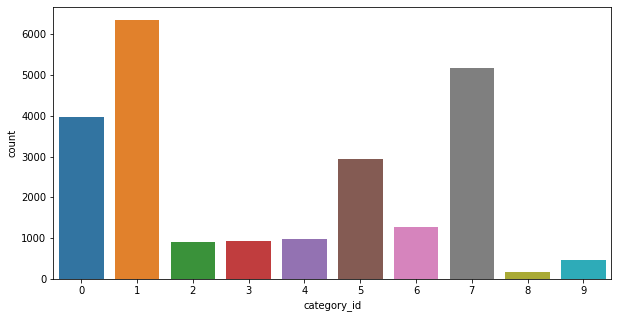

In [8]:
plt.rcParams["figure.figsize"] = (10,5)
categories_counter = [annotation["category_id"] for annotation in annotations]
dataframe = pd.DataFrame(categories_counter, columns=['category_id'])
sns.countplot(x='category_id', data=dataframe)

<AxesSubplot:xlabel='category_set', ylabel='category_count'>

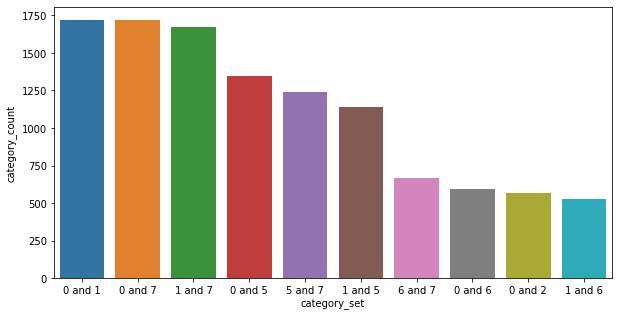

In [9]:
from itertools import combinations
cate_combination = []
for image in images:
    combi = list(combinations(set(image['bbox_category']), 2))
    if combi:
        cate_combination.extend(combi)
    cate_combination.extend(list(combinations(set(image['bbox_category']), 2)))
combi_counter = Counter(cate_combination).most_common(10)
category_set = [ f"{c[0][0]} and {c[0][1]}"for c in combi_counter]
category_count = [ c[1] for c in combi_counter]
raw_data = {
    'category_set': category_set,
    'category_count': category_count
}
dataframe = pd.DataFrame(raw_data)
sns.barplot(x='category_set', y='category_count',data=dataframe)

In [10]:
image_counter = Counter([annotation["image_id"] for annotation in annotations])
image_counter = list(image_counter.items())
image_counter.sort(key=lambda x : x[1], reverse=True)
print(image_counter[:62])
print(image_counter[-10:])

[(4197, 71), (946, 55), (4047, 52), (394, 48), (1955, 46), (2416, 46), (2981, 46), (1678, 44), (1797, 42), (4492, 42), (4841, 41), (2521, 40), (3825, 40), (4778, 40), (1020, 39), (1671, 39), (384, 38), (1058, 38), (4119, 38), (624, 37), (3026, 37), (4225, 37), (1177, 35), (1872, 35), (3403, 35), (272, 34), (694, 34), (2794, 34), (3046, 34), (3049, 34), (3450, 34), (352, 33), (956, 33), (3601, 33), (655, 32), (833, 32), (1918, 32), (2189, 32), (2387, 32), (2956, 32), (3148, 32), (3430, 32), (4261, 32), (168, 31), (767, 31), (840, 31), (1669, 31), (1997, 31), (2182, 31), (2572, 31), (2678, 31), (3796, 31), (321, 30), (1002, 30), (3135, 30), (3716, 30), (4537, 30), (389, 29), (751, 29), (1496, 29), (2815, 29), (2852, 29)]
[(4863, 1), (4864, 1), (4865, 1), (4868, 1), (4869, 1), (4870, 1), (4873, 1), (4874, 1), (4878, 1), (4880, 1)]


<AxesSubplot:xlabel='bbox_number', ylabel='count'>

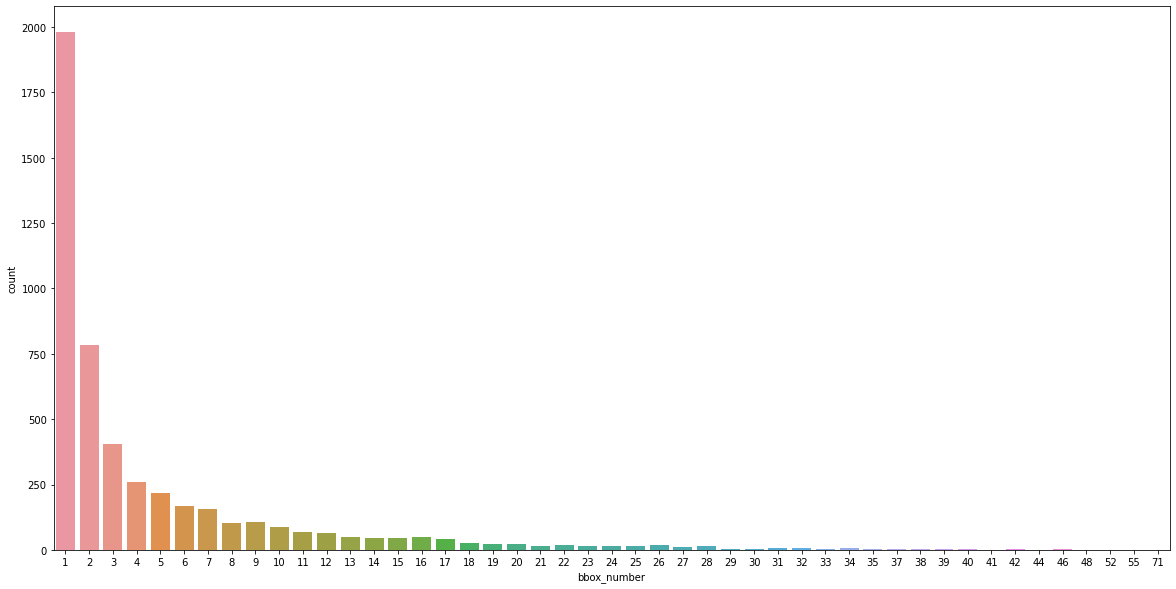

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
dataframe = pd.DataFrame(image_counter)
dataframe.columns = ['images_id', 'bbox_number']
sns.countplot(x='bbox_number', data=dataframe)

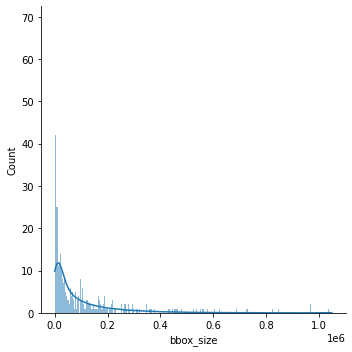

In [12]:
plt.rcParams["figure.figsize"] = (100,70)
bbox_size = [ annotation["area"] for annotation in annotations ]
dataframe = pd.DataFrame(bbox_size, columns=['bbox_size'])
sns.displot(dataframe, x="bbox_size", kde=True, bins=20000)

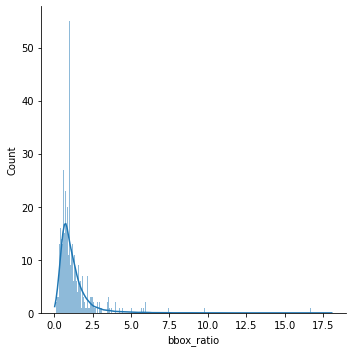

In [13]:
bbox_ratio = [ annotation['bbox'][3] / annotation['bbox'][2] for annotation in annotations ]
dataframe = pd.DataFrame(bbox_ratio, columns=['bbox_ratio'])
sns.displot(dataframe, x="bbox_ratio", kde=True, bins=20000)

In [18]:
from PIL import Image, ImageDraw, ImageFont
import random
def getPILImage(imageId, isTest=False):
	firstName = "/opt/ml/detection/dataset/train"
	if isTest:
		firstName = "/opt/ml/detection/dataset/train"

	fileName = f"{imageId:04}.jpg"

	imagePath = os.path.join(firstName,fileName)
	return Image.open(imagePath)

def drawBboxInImage(img, bbox_cate, bbox):
	draw = ImageDraw.Draw(img)
	for categoryName, bbox in zip(bbox_cate, bbox):

		x1, y1, width, length = bbox
		draw.rectangle(((x1,y1),(x1+width,y1+length)),width=3 ,outline=(random.randint(0,255),random.randint(0,255),random.randint(0,255)))

		imageFont = ImageFont.load_default()
		text = categoryName
		text_width, text_height = imageFont.getsize(text)
		draw.rectangle(((x1, y1 - text_height), (x1 + text_width, y1)), fill=(0, 0, 0))
		draw.text((x1, y1 - text_height), text, font=imageFont, fill=(255, 255, 255))

	return img

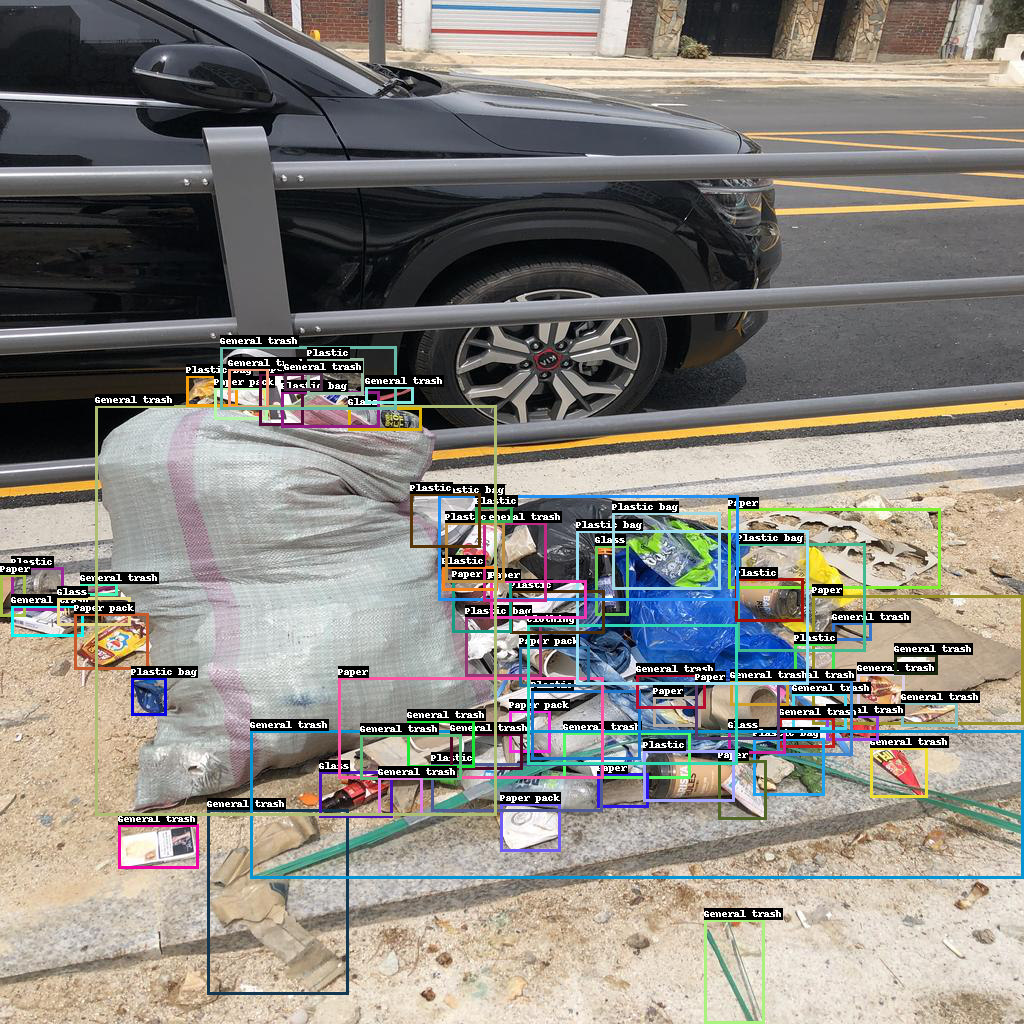

In [17]:
imageId = 4197 # 여기 바꿔서 확인해보기!
bbox_cate = [categories[i]["name"] for i in images[imageId]['bbox_category']]
bbox = images[imageId]['bbox']
img = getPILImage(imageId)
imgs = drawBboxInImage(img,bbox_cate, bbox)

imgs

In [21]:
images[4197]['bbox']

[[11.5, 567.6, 51.8, 42.7],
 [0.0, 574.0, 25.1, 42.4],
 [80.3, 583.6, 37.2, 11.9],
 [11.2, 605.7, 72.5, 31.0],
 [57.6, 597.8, 72.8, 27.9],
 [74.8, 613.3, 73.5, 56.1],
 [131.7, 677.1, 35.2, 38.3],
 [728.7, 508.7, 211.6, 79.7],
 [118.5, 824.4, 80.3, 44.4],
 [207.6, 809.7, 141.2, 184.6],
 [812.0, 595.8, 211.6, 128.5],
 [857.1, 673.5, 47.7, 36.1],
 [894.0, 654.5, 43.3, 19.8],
 [901.1, 702.2, 56.6, 23.9],
 [704.3, 919.9, 60.6, 103.9],
 [870.9, 747.4, 56.2, 50.3],
 [832.3, 622.0, 38.9, 18.3],
 [319.3, 771.8, 72.8, 45.2],
 [826.9, 715.9, 51.8, 24.9],
 [792.0, 693.6, 54.9, 36.3],
 [779.2, 717.2, 55.2, 30.0],
 [794.8, 643.6, 39.6, 28.4],
 [737.9, 543.2, 127.7, 107.9],
 [777.1, 680.4, 75.2, 74.9],
 [735.5, 578.8, 68.1, 42.2],
 [753.8, 738.0, 70.4, 57.9],
 [728.0, 730.2, 57.9, 23.4],
 [718.9, 760.6, 47.7, 58.7],
 [500.1, 803.3, 60.6, 47.7],
 [730.4, 680.9, 57.6, 24.9],
 [563.1, 732.7, 127.7, 46.0],
 [597.0, 773.1, 51.8, 34.0],
 [509.0, 710.1, 41.3, 42.7],
 [531.6, 690.5, 108.7, 69.1],
 [643.4, 75

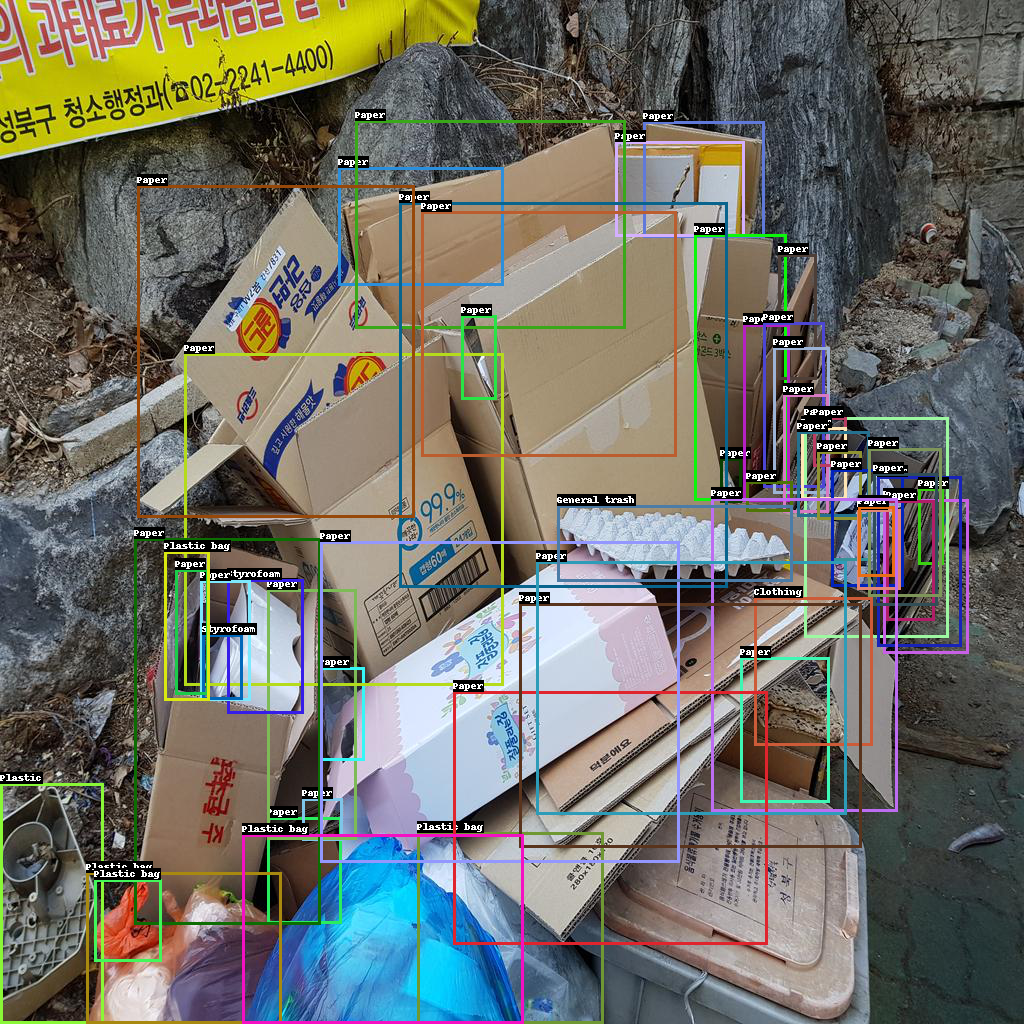

In [ ]:
imageId = 946 # 여기 바꿔서 확인해보기!
bbox_cate = [categories[i]["name"] for i in images[imageId]['bbox_category']]
bbox = images[imageId]['bbox']
img = getPILImage(imageId)
imgs = drawBboxInImage(img,bbox_cate, bbox)

imgs

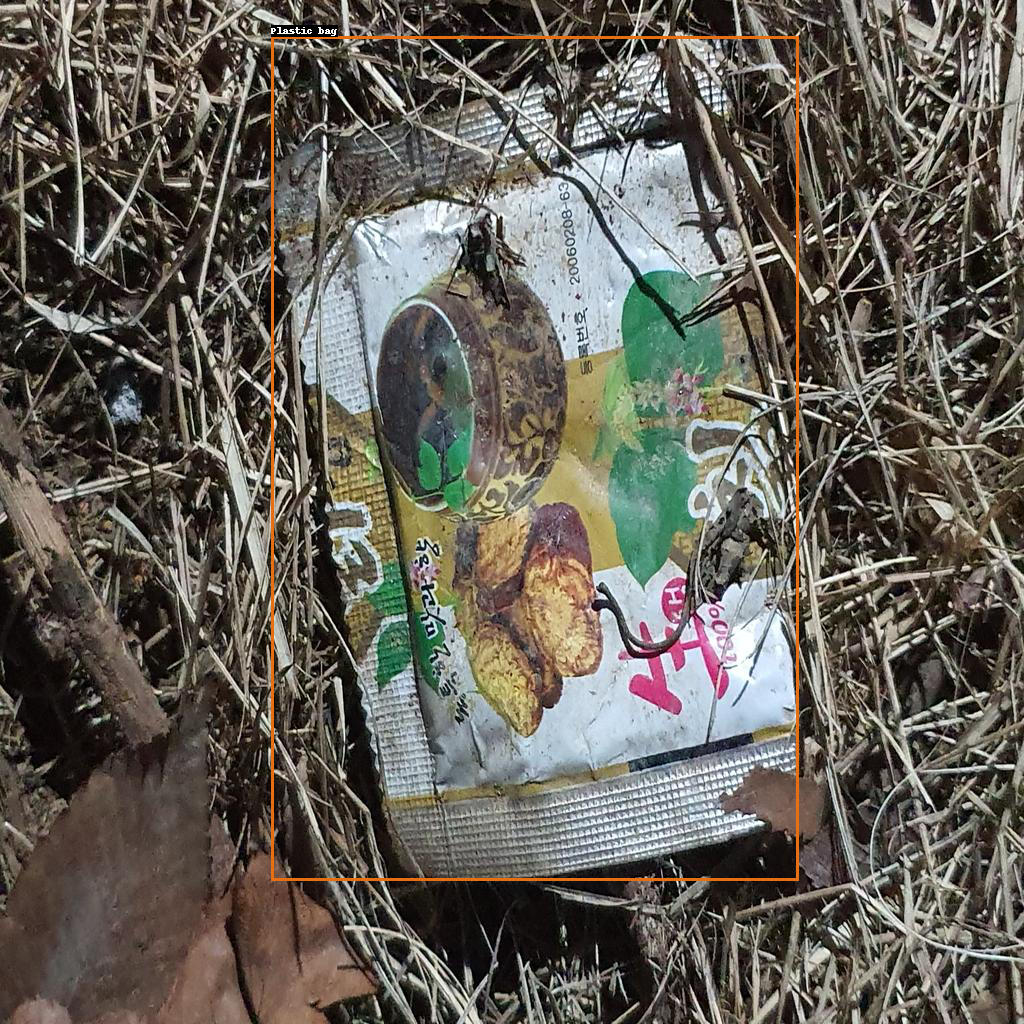

In [ ]:
imageId = 4863 # 여기 바꿔서 확인해보기!
bbox_cate = [categories[i]["name"] for i in images[imageId]['bbox_category']]
bbox = images[imageId]['bbox']
img = getPILImage(imageId)
imgs = drawBboxInImage(img,bbox_cate, bbox)

imgs

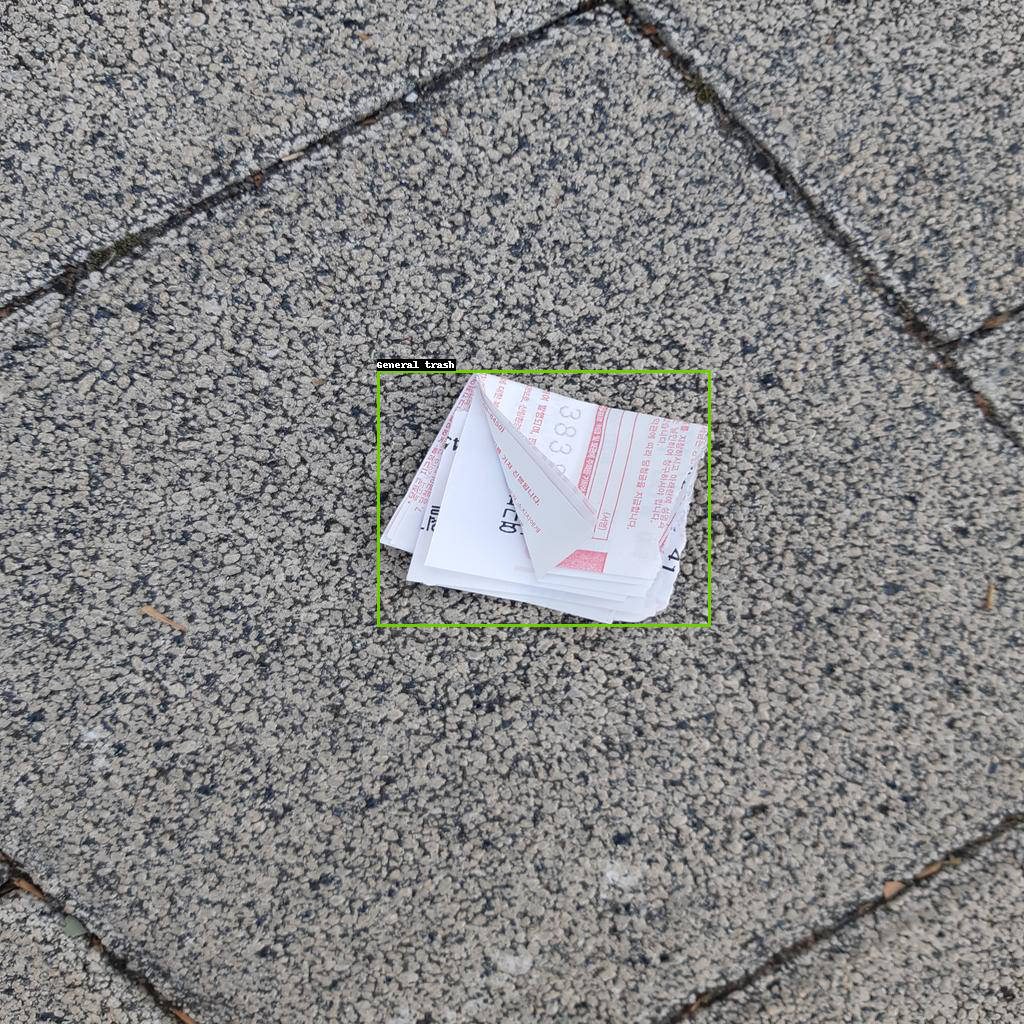

In [ ]:
imageId = 4878 # 여기 바꿔서 확인해보기!
bbox_cate = [categories[i]["name"] for i in images[imageId]['bbox_category']]
bbox = images[imageId]['bbox']
img = getPILImage(imageId)
imgs = drawBboxInImage(img,bbox_cate, bbox)

imgs